In [1]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
import numpy as np
from keras.preprocessing import image

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
classifier = Sequential()

In [4]:
classifier.add(Convolution2D(32, (3, 3), input_shape=(64,64,3), activation='relu'))

In [5]:
classifier.add(MaxPooling2D(pool_size=(2,2)))

In [6]:
classifier.add(Convolution2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))

In [7]:
classifier.add(Flatten())

In [8]:
classifier.add(Dense(128, activation='relu'))
classifier.add(Dense(1, activation='sigmoid'))

In [9]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 32 using train_datagen generator
training_set = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/pimgs/train',
    target_size=(64, 64),  # Set the target size for the images
    batch_size=32,
    class_mode='binary'
)

# Flow validation images in batches of 32 using test_datagen generator
test_set = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/pimgs/test',
    target_size=(64, 64),  # Set the target size for the images
    batch_size=32,
    class_mode='binary'
)

Found 387 images belonging to 2 classes.
Found 243 images belonging to 2 classes.


Found 387 images belonging to 2 classes.
Found 294 images belonging to 2 classes.
Epoch 1/25
12/12 [==============================] - 68s 6s/step - loss: 0.6910 - accuracy: 0.5465 - val_loss: 0.6104 - val_accuracy: 0.7708
Epoch 2/25
12/12 [==============================] - 22s 2s/step - loss: 0.5419 - accuracy: 0.7606 - val_loss: 0.5865 - val_accuracy: 0.7257
Epoch 3/25
12/12 [==============================] - 21s 2s/step - loss: 0.5378 - accuracy: 0.7493 - val_loss: 0.4861 - val_accuracy: 0.7708
Epoch 4/25
12/12 [==============================] - 19s 2s/step - loss: 0.4412 - accuracy: 0.8028 - val_loss: 0.3881 - val_accuracy: 0.8264
Epoch 5/25
12/12 [==============================] - 16s 1s/step - loss: 0.4005 - accuracy: 0.8333 - val_loss: 0.3315 - val_accuracy: 0.8472
Epoch 6/25
12/12 [==============================] - 21s 2s/step - loss: 0.4247 - accuracy: 0.8085 - val_loss: 0.3383 - val_accuracy: 0.8958
Epoch 7/25
12/12 [==============================] - 19s 2s/step - loss: 0.3406

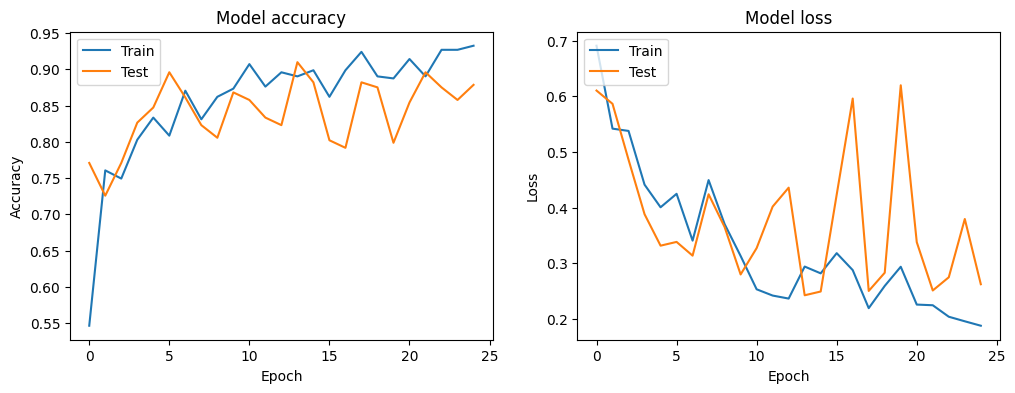

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

# ImageDataGenerator for training and testing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Path to your training and testing directories
train_dir = '/content/drive/MyDrive/pimgs/train'
test_dir = '/content/drive/MyDrive/pimgs/test'

# Create training and testing sets
training_set = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

test_set = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

# Calculate steps_per_epoch and validation_steps
train_steps_per_epoch = training_set.samples // training_set.batch_size
val_steps = test_set.samples // test_set.batch_size

# Define your model
classifier = Sequential([
    Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(units=128, activation='relu'),
    Dropout(0.5),
    Dense(units=1, activation='sigmoid')
])

# Compile the model
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model using Model.fit
history = classifier.fit(
    training_set,
    steps_per_epoch=train_steps_per_epoch,
    epochs=25,
    validation_data=test_set,
    validation_steps=val_steps
)

# Print the history keys to see available metrics
print(history.history.keys())

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


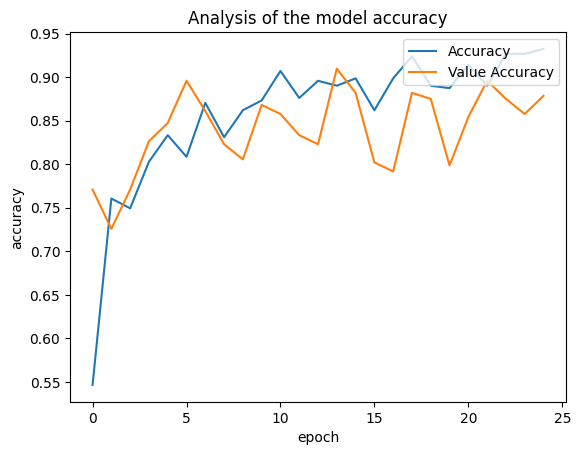

In [26]:
plt.plot(classifier.history.history['accuracy'])
plt.plot(classifier.history.history['val_accuracy'])
plt.title('Analysis of the model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Accuracy', 'Value Accuracy'], loc='upper right')
plt.show()

In [27]:
def predictImg(imgpath):
    predict_image = image.load_img(imgpath, target_size = (64,64))
    predict_image = image.img_to_array(predict_image)
    predict_image = np.expand_dims(predict_image, axis=0)
    result = classifier.predict(predict_image)
    return result.max()

In [28]:
predictImg('/content/drive/MyDrive/testing images/11.jpg')

1/1 [==============================] - 1s 543ms/step


0.0

In [29]:
predictImg('/content/drive/MyDrive/testing images/pic-60-_jpg.rf.4e715308cc8dc7455b767414cda028ab.jpg')

1/1 [==============================] - 0s 23ms/step


0.0

In [30]:
predictImg('/content/drive/MyDrive/testing images/21.jpg')

1/1 [==============================] - 0s 47ms/step


1.0

In [31]:
predictImg('/content/drive/MyDrive/testing images/pic-4-_jpg.rf.f52085b2d1744eeb56ed5a4b8ba0fb0f.jpg')

1/1 [==============================] - 0s 32ms/step


1.0

In [32]:
predictImg('/content/drive/MyDrive/pic-204-_jpg.rf.c3990b25e295bfd6b4605c6305cce37c.jpg')

1/1 [==============================] - 0s 91ms/step


1.0

In [33]:
predictImg('/content/drive/MyDrive/pic-6-_jpg.rf.20fe5b2f0851cc97b06f4a9d68881330.jpg')

1/1 [==============================] - 0s 46ms/step


1.0